### Import necessary libraries

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Merge data from each month into one CSV

In [2]:
files = [file for file in os.listdir(r'C:/Users/Abhishek/Desktop/sales data') ]
all_month = pd.DataFrame()
for file in files:
    df1 = pd.read_csv(r'C:/Users/Abhishek/Desktop/sales data/'+file)
    all_month = pd.concat([all_month,df1])
all_month    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Read in updated dataframe

In [4]:
all_month.to_csv('all_data.csv', index = False) # saving into new dataframe
all_data = pd.read_csv(r'all_data.csv') # read in new dataframe

## Clean up
### The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### Dropping the the NAN values

In [5]:
all_data = all_data.dropna(how = 'any') # droping NAN values
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


### Task 1 :Adding Month Column

In [6]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data = all_data[all_data['Month']!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [7]:
all_data['Month']=pd.to_numeric(all_data['Month']) # Changing Month Data type

### Task 2 : Adding sales column

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Column to to correct type
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] # Column of sales
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Data Exploration!
### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
best_month = all_data.groupby('Month').sum().reset_index()
best_month

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


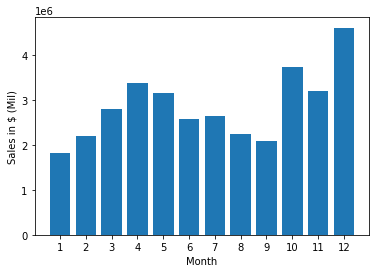

In [11]:
# plotting the bar chart
plt.bar(best_month['Month'],best_month['Sales'])
plt.xticks(best_month["Month"])
plt.xlabel('Month')
plt.ylabel('Sales in $ (Mil)')
plt.show()

#### Task 4: Add a city column.

In [12]:
# let use apply() method.
def state(x):
    return x.split(',')[2].split(' ')[1]
def city(x):
    return x.split(',')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x:city(x)+' '+state(x) )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Question 2 : What city had the highest no. of sales?

In [13]:
result = all_data.groupby('City').sum().reset_index()
result

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta GA,16602,2779908.20,104794,2795498.58
1,Austin TX,11153,1809873.61,69829,1819581.75
2,Boston MA,22528,3637409.77,141112,3661642.01
3,Dallas TX,16730,2752627.82,104620,2767975.40
4,Los Angeles CA,33289,5421435.23,208325,5452570.80
5,New York City NY,27932,4635370.83,175741,4664317.43
6,Portland ME,2750,447189.25,17144,449758.27
7,Portland OR,11303,1860558.22,70621,1870732.34
8,San Francisco CA,50239,8211461.74,315520,8262203.91
9,Seattle WA,16553,2733296.01,104941,2747755.48


In [14]:
sale_city = all_data.groupby('City').sum()
sale_city =sale_city.reset_index()

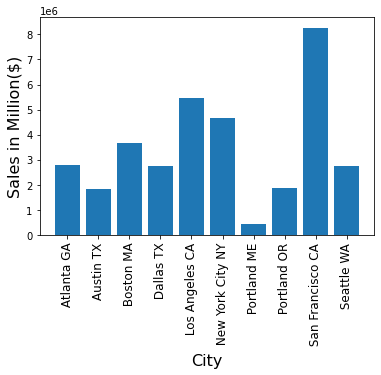

In [15]:
plt.bar(sale_city['City'],sale_city['Sales'])
plt.xticks(sale_city['City'], rotation=90,size=12)
plt.xlabel('City',size=16)
plt.ylabel('Sales in Million($)',size=16)
plt.show()

### Question 3 : What time should we display advertisement to maximize likelihood of customer's buying product?

In [16]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date']) # changing oder date column to date time data type

In [17]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minutes']=all_data['Order Date'].dt.minute
data_time=all_data.groupby('Hour').sum().reset_index()
data_time

,Hour,Quantity Ordered,Price Each,Month,Sales,Minutes
0,0,4428,709296.70,27554,713721.27,103596
1,1,2619,458490.00,16657,460866.88,61807
2,2,1398,233833.64,8507,234851.44,32508
3,3,928,144726.42,5904,145757.89,23044
4,4,937,162058.18,6148,162661.01,26876
5,5,1493,229621.21,9301,230679.82,42877
6,6,2810,445000.11,17539,448113.00,80343
7,7,4556,740568.11,28850,744854.12,127447
8,8,7002,1185970.62,43626,1192348.97,198135
9,9,9816,1628498.49,60981,1639030.58,268253


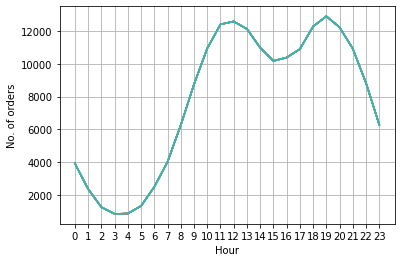

In [18]:
x=data_time.Hour
y=all_data.groupby('Hour').count()
plt.plot(x,y)
plt.xticks(x)
plt.xlabel('Hour')
plt.ylabel('No. of orders')
plt.grid()
plt.show()

### Queston 4: what product are most sold often together?

In [19]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(20)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_14108\2648263561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [20]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(20)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [21]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))


In [22]:
for key, value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

#### Question 4: What product sold the most? why do you think it sold the most?

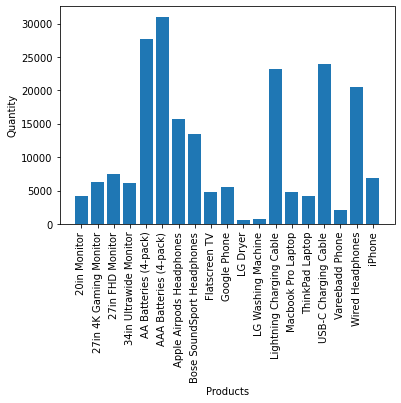

In [23]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
product_group = all_data.groupby('Product').sum().reset_index()
x = product_group['Product']
y = product_group['Quantity Ordered']
plt.bar(x,y)
plt.xticks(x, rotation='vertical', size=10)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_14108\3944270370.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation='vertical', size=12)


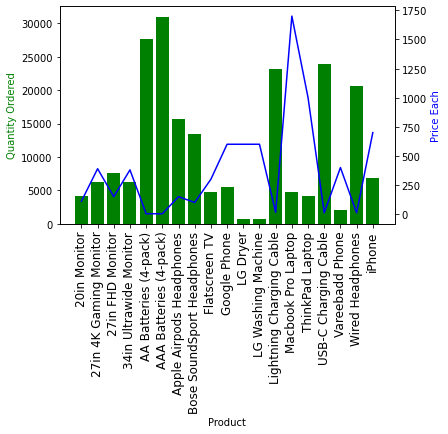

In [24]:
price = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y,color='g')
ax2.plot(x, price, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
ax1.set_xticklabels(x, rotation='vertical', size=12)
plt.show()